In [60]:
import importlib

import pandas as pd

import pff

importlib.reload(pff)

from pff import process_metadata_pff

df_metadata = pd.read_parquet("./data/13335/metadata.parquet")

df = process_metadata_pff(df_metadata)
df

frame_id  period  elapsed_seconds  event_id  \
0          220       1         0.000000  18862231   
1          305       1         2.835844  18884478   
2          386       1         5.538546  18884487   
3          463       1         8.107782  18884496   
4          525       1        10.176518  18884505   
...        ...     ...              ...       ...   
1934    182780       2      3188.256432  18899864   
1935    182780       2      3188.256432  18899864   
1936    182780       2      3188.256432  18899864   
1937    182780       2      3188.256432  18899864   
1938    182821       2      3189.624467  18899871   

                                  event_type  event_player_id  event_team_id  \
0     PFF_Frame_GameEventType.FIRST_KICK_OFF             7001            221   
1        PFF_Frame_GameEventType.ON_THE_BALL            18361            221   
2        PFF_Frame_GameEventType.ON_THE_BALL             5151            218   
3        PFF_Frame_GameEventType.ON_THE_BALL              567            218   
4        PFF_Frame_GameEventType.ON_THE_BALL              139            218   
...                                      ...              ...            ...   
1934     PFF_Frame_GameEventType.ON_THE_BALL              567            218   
1935     PFF_Frame_GameEventType.ON_THE_BALL              567            218   
1936     PFF_Frame_GameEventType.ON_THE_BALL              567            218   
1937     PFF_Frame_GameEventType.ON_THE_BALL              567            218   
1938     PFF_Frame_GameEventType.ON_THE_BALL             4228            221   

      event_start_frame  event_end_frame  possession_id  \
0                   220              220       18767171   
1                   257              305       18788519   
2                   386              386       18788527   
3                   463              463       18788535   
4                   490              525       18788544   
...                 ...              ...            ...   
1934             182780           182780       18803919   
1935             182780           182780       18803919   
1936             182780           182780       18803919   
1937             182780           182780       18803919   
1938             182821           182927       18803927   

                          possession_type  possession_start_frame  
0          Frame_PossessionEventType.PASS                     220  
1          Frame_PossessionEventType.PASS                     305  
2          Frame_PossessionEventType.PASS                     386  
3          Frame_PossessionEventType.PASS                     463  
4     Frame_PossessionEventType.CHALLENGE                     525  
...                                   ...                     ...  
1934  Frame_PossessionEventType.CHALLENGE                  182780  
1935  Frame_PossessionEventType.CHALLENGE                  182780  
1936  Frame_PossessionEventType.CHALLENGE                  182780  
1937  Frame_PossessionEventType.CHALLENGE                  182780  
1938  Frame_PossessionEventType.CHALLENGE                  182821  

[1939 rows x 12 columns]

In [40]:
import pandas as  pd
import numpy as np

df_metadata = pd.read_parquet("./data/13335/metadata.parquet")

df_metadata = df_metadata.drop(["match_id", "home_has_possession"], axis=1)

df_metadata.replace({"possession_type": "nan"}, np.nan, inplace=True)
df_metadata.replace({"event_type": "nan"}, np.nan, inplace=True)

df_cross = df_metadata[df_metadata["possession_type"] == "Frame_PossessionEventType.CROSS"]

# window = 300
# for idx, row in df_cross.iterrows():
#         print("Novo cruzamento")
#         cross_team = row.get("event_team_id")
#         print(cross_team)

#         # Verifica se algum evento seguinte tem posse do mesmo time
#         next_valid = df_metadata.iloc[idx+1:idx+121].loc[df_metadata["possession_type"].notna()].head(1)
#         if not next_valid.empty:
#             next_team = next_valid["event_team_id"].values[0]
#             print(next_team)
#             # if next_team == cross_team:
#             #     df.at[idx, "cross_possession_result"] = "maintained"
#             # else:
#             #     df.at[idx, "cross_possession_result"] = "lost"

frame_id = df_cross.iloc[4]["frame_id"]
df_metadata[
(df_metadata["frame_id"].isin(list(range(frame_id, frame_id+121)))) &
(df_metadata["possession_type"].notna())
]

frame_id  period  elapsed_seconds    event_id  \
38774     38769       1      1286.252594  18888272.0   
38867     38862       1      1289.355697  18888280.0   

                                event_type  event_setpiece_type  \
38774  PFF_Frame_GameEventType.ON_THE_BALL                  NaN   
38867  PFF_Frame_GameEventType.ON_THE_BALL                  NaN   

       event_player_id  event_team_id  event_start_frame  event_end_frame  \
38774             60.0          221.0            38690.0          38769.0   
38867           9280.0          218.0            38862.0          38862.0   

       possession_id                      possession_type  \
38774     18792342.0      Frame_PossessionEventType.CROSS   
38867     18792350.0  Frame_PossessionEventType.CLEARANCE   

       possession_start_frame  possession_end_frame sequence version  \
38774                 38769.0                   NaN     None    None   
38867                 38862.0                   NaN     None    None   

       video_time_milli  
38774       1293593.594  
38867       1296696.697

In [1]:

import pandas as pd
df_players = pd.read_parquet("./data/13335/players.parquet")

In [5]:
import importlib
import pff

importlib.reload(pff)

from pff import process_players_pff

df = process_players_pff(df_players)
df

frame_id  period  shirt       x       y  team  ball_x  ball_y  \
0             220       1      6   8.438  -5.446  away    2.03    0.94   
1             220       1      7   6.818  20.893  away    2.03    0.94   
2             220       1     10   0.563  15.081  away    2.03    0.94   
3             220       1     11  -3.821  21.154  away    2.03    0.94   
4             220       1     15   9.753 -18.505  away    2.03    0.94   
...           ...     ...    ...     ...     ...   ...     ...     ...   
7426975    182943       2     14 -24.273 -16.760  home  -55.63    0.97   
7426976    182943       2     15 -20.319  -3.489  home  -55.63    0.97   
7426977    182943       2     16  -6.341   0.561  home  -55.63    0.97   
7426978    182943       2     24  31.866  -0.709  home  -55.63    0.97   
7426979    182943       2     30 -35.460   0.168  home  -55.63    0.97   

         ball_z  ball_vx  ball_vy  ball_vz  ball_speed    ball_ax  ball_ay  \
0          0.07      NaN      NaN      NaN         NaN        NaN      NaN   
1          0.07      NaN      NaN      NaN         NaN        NaN      NaN   
2          0.07      NaN      NaN      NaN         NaN        NaN      NaN   
3          0.07      NaN      NaN      NaN         NaN        NaN      NaN   
4          0.07      NaN      NaN      NaN         NaN        NaN      NaN   
...         ...      ...      ...      ...         ...        ...      ...   
7426975   -2.62      0.0      0.0      0.0         0.0 -17.964233 -53.8927   
7426976   -2.62      0.0      0.0      0.0         0.0 -17.964233 -53.8927   
7426977   -2.62      0.0      0.0      0.0         0.0 -17.964233 -53.8927   
7426978   -2.62      0.0      0.0      0.0         0.0 -17.964233 -53.8927   
7426979   -2.62      0.0      0.0      0.0         0.0 -17.964233 -53.8927   

          ball_az        vx        vy     speed  
0             NaN -0.060531 -0.257256  0.264281  
1             NaN  0.030265 -0.363185  0.364444  
2             NaN -0.802034  0.332920  0.868386  
3             NaN  0.272389  1.180352  1.211374  
4             NaN  0.090796  0.438849  0.448143  
...           ...       ...       ...       ...  
7426975  80.83905  1.398587 -0.379617  1.449191  
7426976  80.83905  2.447528  0.509485  2.499994  
7426977  80.83905  4.755197 -1.078910  4.876059  
7426978  80.83905  0.429566  0.119879  0.445980  
7426979  80.83905  2.487488 -0.429566  2.524306  

[7426980 rows x 19 columns]

In [3]:
df.columns

Index(['elapsed_seconds', 'frame_id', 'match_id', 'period', 'shirt', 'x', 'y',
       'team', 'ball_x', 'ball_y', 'ball_z', 'ball_vx', 'ball_vy', 'ball_vz',
       'ball_speed', 'ball_ax', 'ball_ay', 'ball_az', 'vx', 'vy', 'ax', 'ay',
       'speed', 'vx_smooth', 'vy_smooth', 'speed_smooth'],
      dtype='object')

In [55]:
df_players

elapsed_seconds frame_id  match_id  ...          ax         ay     speed
0               0.000000      220   13621.0  ...         NaN        NaN       NaN
1               0.033041      221       NaN  ...         NaN        NaN  0.528563
2               0.066407      222       NaN  ...    3.628296  15.420256  0.000000
3               0.099774      223       NaN  ...   -3.592739 -21.556434  0.729195
4               0.133141      224       NaN  ...    3.592739  21.556434  0.000000
...                  ...      ...       ...  ...         ...        ...       ...
7426975      3193.561737   182939       NaN  ... -227.247552   0.000000  0.000000
7426976      3193.595104   182940       NaN  ...  216.462525   0.898185  7.222767
7426977      3193.628471   182941       NaN  ... -216.462525  -0.898185  0.000000
7426978      3193.661838   182942       NaN  ...  223.648003 -38.621944  7.572919
7426979      3193.695204   182943       NaN  ... -223.654706  38.623102  0.000000

[7426980 rows x 23 columns]

In [ ]:
import pandas as pd
from utils import smooth_velocity_by_player


df_players = pd.read_parquet("./data/13335/players.parquet")
df_metadata = pd.read_parquet("./data/13335/metadata.parquet")

df_players = df_players.sort_values(by=["frame_id", "team", "shirt"])

df_crosses = df_metadata[df_metadata["possession_type"] == "Frame_PossessionEventType.CROSS"]
df_crosses["frame_id"] = df_crosses["frame_id"].astype(int)
df_players["frame_id"] = df_players["frame_id"].astype(int)

df_frames = pd.DataFrame()

cross_id = 0

for _, cross in df_crosses.iterrows():
    central_frame = cross["frame_id"]
    match_id = cross["match_id"]
    period = cross["period"]
    
    # Define a janela de frames (±60)
    window_ids = list(range(central_frame - 120, central_frame + 121))
    
    # Filtra os frames da janela
    window_frames = df_metadata[
        (df_metadata["frame_id"].isin(window_ids)) &
        (df_metadata["period"] == period)
    ].copy()
    
    # Marca o frame central como CROSS
    # window_frames["possession_type"] = None
    window_frames["cross_id"] = cross_id
    # window_frames.loc[window_frames["frame_id"] == central_frame, "possession_type"] = "CROSS"

    # window_frames = smooth_velocity_by_player(window_frames)

    cross_id += 1
    
    df_frames = pd.concat([df_frames, window_frames])

df_frames.reset_index(drop=True, inplace=True)
df_frames.head()

/tmp/ipykernel_326380/1307596699.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crosses["frame_id"] = df_crosses["frame_id"].astype(int)


match_id  frame_id  period  elapsed_seconds home_has_possession  event_id  \
0       NaN      3762       1       118.184526                None       NaN   
1       NaN      3763       1       118.217892                None       NaN   
2       NaN      3764       1       118.251259                None       NaN   
3       NaN      3765       1       118.284626                None       NaN   
4       NaN      3766       1       118.317992                None       NaN   

  event_type  event_setpiece_type  event_player_id  event_team_id  \
0        nan                  NaN              NaN            NaN   
1        nan                  NaN              NaN            NaN   
2        nan                  NaN              NaN            NaN   
3        nan                  NaN              NaN            NaN   
4        nan                  NaN              NaN            NaN   

   event_start_frame  event_end_frame  possession_id possession_type  \
0                NaN              NaN            NaN             nan   
1                NaN              NaN            NaN             nan   
2                NaN              NaN            NaN             nan   
3                NaN              NaN            NaN             nan   
4                NaN              NaN            NaN             nan   

   possession_start_frame  possession_end_frame sequence version  \
0                     NaN                   NaN     None    None   
1                     NaN                   NaN     None    None   
2                     NaN                   NaN     None    None   
3                     NaN                   NaN     None    None   
4                     NaN                   NaN     None    None   

   video_time_milli  cross_id  
0        125525.526         0  
1        125558.892         0  
2        125592.259         0  
3        125625.626         0  
4        125658.992         0

In [2]:
print(df_frames.columns.tolist())

['elapsed_seconds', 'frame_id', 'match_id', 'period', 'shirt', 'x', 'y', 'team', 'ball_x', 'ball_y', 'ball_z', 'ball_vx', 'ball_vy', 'ball_vz', 'ball_speed', 'ball_ax', 'ball_ay', 'ball_az', 'vx', 'vy', 'ax', 'ay', 'speed', 'possession_type', 'cross_id', 'vx_smooth', 'vy_smooth', 'speed_smooth']


In [3]:
def standardize_attack_direction(df_frames):
    """
    Padroniza a direção de ataque dos cruzamentos para que todos ocorram da esquerda para a direita

    Parâmetros:
        df_frames (pd.DataFrame): DataFrame contendo os dados de tracking dos jogadores e da bola, já
                                  segmentados por janelas de cruzamentos. Espera-se que contenha as colunas:
                                  ['x', 'vx', 'ax', 'ball_x', 'ball_vx', 'ball_ax', 'vx_smooth', 'cross_id',
                                  'possession_type'].

    Retorna:
        pd.DataFrame: Uma cópia do DataFrame original, com todos os cruzamentos padronizados para
                      ocorrerem no sentido da esquerda para a direita (x positivo).
    """
    
    df = df_frames.copy()
    mask_cross = df["possession_type"] == "CROSS"
    cross_ids = df.loc[mask_cross, "cross_id"].dropna().unique()

    if len(cross_ids) == 0:
        return df

    ball_x_cross = (
        df[mask_cross]
        .groupby("cross_id")["ball_x"]
        .mean()
        .to_dict()
    )

    # Identificar os cross_id onde a bola estava do lado esquerdo
    cross_to_flip = {
        cross_id for cross_id, ball_x in ball_x_cross.items()
        if pd.notna(ball_x) and ball_x < 0
    }
    mask_to_flip = df["cross_id"].isin(cross_to_flip)

    cols_to_flip = [
        "x", "vx", "ax",
        "ball_x", "ball_vx", "ball_ax",
        "vx_smooth"
    ]

    # Aplicar espelhamento
    df.loc[mask_to_flip, cols_to_flip] = -df.loc[mask_to_flip, cols_to_flip]

    return df

In [4]:
def has_left_side_crosses(df):
    """
    Verifica se há cruzamentos originados no lado esquerdo do campo (x < 0).
    
    Parâmetros:
    -----------
    df : DataFrame
        DataFrame com dados de tracking contendo as colunas:
        ["possession_type", "cross_id", "ball_x"]
    
    Retorna:
    --------
    bool
        True se existir pelo menos um cruzamento no lado esquerdo,
        False caso contrário
    """
    cross_mask = df["possession_type"] == "CROSS"
    if not cross_mask.any():
        return False
    
    return (df.loc[cross_mask, "ball_x"] < 0).any()

In [5]:
has_left_side_crosses(df_frames)

np.True_

In [6]:
df_original = df_frames.copy()
df_frames = standardize_attack_direction(df_frames)

In [7]:
has_left_side_crosses(df_frames)

np.False_

Text(0.5, 1.0, 'Antes do espelhamento')

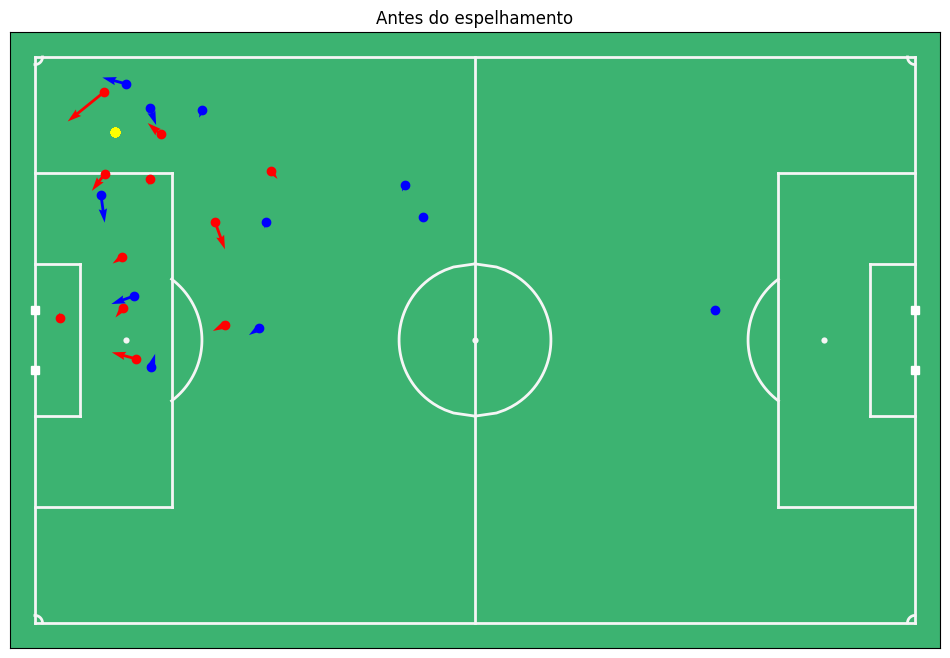

In [8]:
from utils import plot_pitch, to_home_away_team
import matplotlib.pyplot as plt

df_frame = df_original[(df_original["cross_id"] == 0) & (df_original["possession_type"] == "CROSS")]

df_home, df_away = to_home_away_team(df_frame)

fig, ax = plot_pitch()

plt.scatter(df_frame['ball_x'], df_frame['ball_y'], color='yellow', marker='o', zorder=5)

plt.scatter(df_home["x"], df_home["y"], color="red", zorder=5)
plt.quiver(df_home["x"], df_home["y"], df_home["vx_smooth"], df_home["vy_smooth"], color="red", angles='xy', scale_units='xy', scale=1, width=0.003, zorder=5)

plt.scatter(df_away["x"], df_away["y"], color="blue", zorder=5)
plt.quiver(df_away["x"], df_away["y"], df_away["vx_smooth"], df_away["vy_smooth"], color="blue", angles='xy', scale_units='xy', scale=1, width=0.003, zorder=5)
plt.title("Antes do espelhamento")

Text(0.5, 1.0, 'Após o espelhamento')

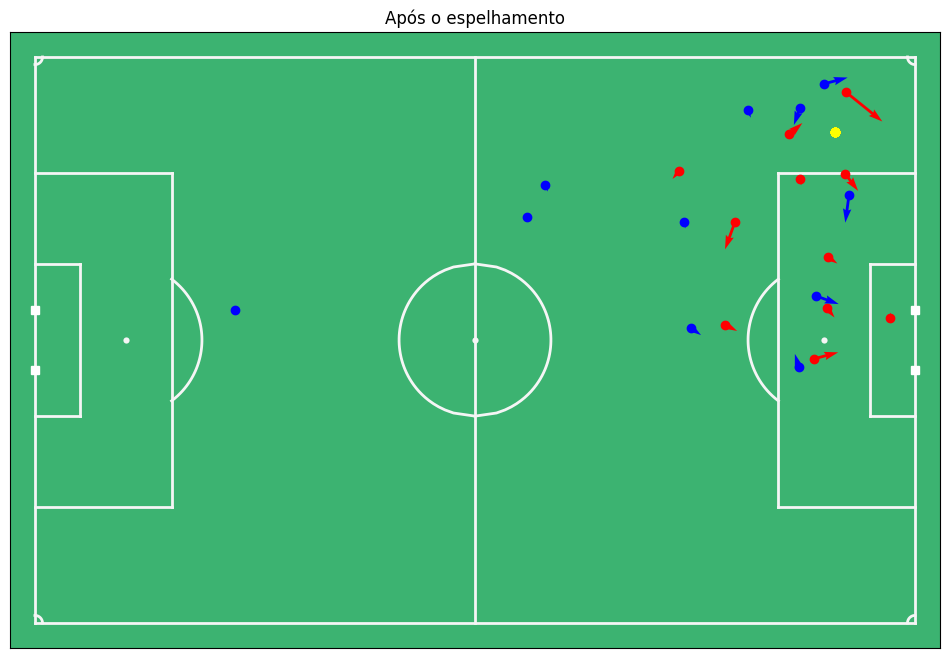

In [9]:
df_frame = df_frames[(df_frames["cross_id"] == 0) & (df_frames["possession_type"] == "CROSS")]

df_home, df_away = to_home_away_team(df_frame)

fig, ax = plot_pitch()

plt.scatter(df_frame['ball_x'], df_frame['ball_y'], color='yellow', marker='o', zorder=5)

plt.scatter(df_home["x"], df_home["y"], color="red", zorder=5)
plt.quiver(df_home["x"], df_home["y"], df_home["vx_smooth"], df_home["vy_smooth"], color="red", angles='xy', scale_units='xy', scale=1, width=0.003, zorder=5)

plt.scatter(df_away["x"], df_away["y"], color="blue", zorder=5)
plt.quiver(df_away["x"], df_away["y"], df_away["vx_smooth"], df_away["vy_smooth"], color="blue", angles='xy', scale_units='xy', scale=1, width=0.003, zorder=5)
plt.title("Após o espelhamento")

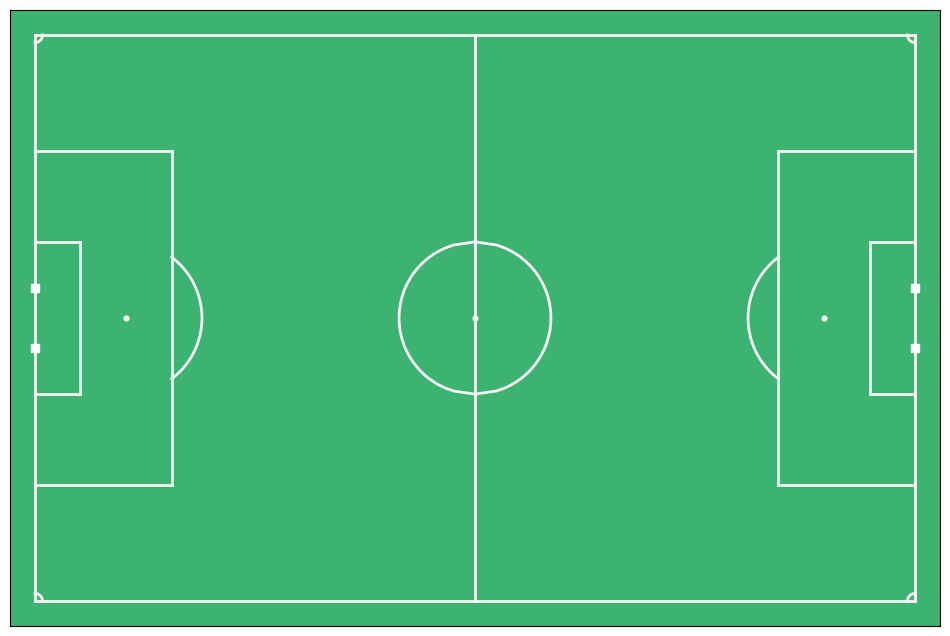

In [6]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from utils import plot_pitch, to_home_away_team

window_frames = df_frames[
    (df_frames["cross_id"] == 2) &
    (df_frames["vx"] != 0) &
    (df_frames["vy"] != 0)
]

unique_frame_ids = window_frames["frame_id"].unique()

fig, ax = plot_pitch()

ball_scatter = ax.scatter([], [], color='yellow', marker='o', zorder=5, s=80)
home_scatter = ax.scatter([], [], color='red', zorder=5)
away_scatter = ax.scatter([], [], color='blue', zorder=5)

home_quiver_obj = [None]
away_quiver_obj = [None]

def update(i):
    frame_id = unique_frame_ids[i]
    df_frame = window_frames[window_frames["frame_id"] == frame_id]
    df_home, df_away = to_home_away_team(df_frame)

    # Update posições dos jogadores e bola
    home_scatter.set_offsets(df_home[["x", "y"]].values)
    away_scatter.set_offsets(df_away[["x", "y"]].values)
    ball_pos = df_frame[["ball_x", "ball_y"]].dropna().values[:1]
    if len(ball_pos) > 0:
        ball_scatter.set_offsets(ball_pos)

    # Remove quivers antigos
    if home_quiver_obj[0]:
        home_quiver_obj[0].remove()
    if away_quiver_obj[0]:
        away_quiver_obj[0].remove()

    # Cria novos quivers
    home_quiver = ax.quiver(df_home["x"], df_home["y"],
                            df_home["vx_smooth"], df_home["vy_smooth"],
                            color="red", angles='xy', scale_units='xy', scale=1, width=0.003, zorder=5)
    away_quiver = ax.quiver(df_away["x"], df_away["y"],
                            df_away["vx_smooth"], df_away["vy_smooth"],
                            color="blue", angles='xy', scale_units='xy', scale=1, width=0.003, zorder=5)

    home_quiver_obj[0] = home_quiver
    away_quiver_obj[0] = away_quiver

    ax.set_title(f"Frame {frame_id}", fontsize=12)

    return home_scatter, away_scatter, ball_scatter

ani = FuncAnimation(fig, update, frames=len(unique_frame_ids), interval=50, blit=False)
plt.show()


from IPython.display import HTML
HTML(ani.to_jshtml())  # ou ani.to_html5_video()


In [11]:
df_metadata["possession_type"].unique()

array(['Frame_PossessionEventType.PASS', 'nan',
       'Frame_PossessionEventType.CHALLENGE',
       'Frame_PossessionEventType.CLEARANCE',
       'Frame_PossessionEventType.BALL_CARRY',
       'Frame_PossessionEventType.CROSS',
       'Frame_PossessionEventType.REBOUND',
       'Frame_PossessionEventType.SHOT'], dtype=object)

In [14]:
df_metadata[df_metadata["possession_type"] != "nan"]

match_id  frame_id  period  elapsed_seconds home_has_possession  \
0        13621.0       220       1         0.000000                None   
85           NaN       305       1         2.835844                None   
166          NaN       386       1         5.538546                None   
243          NaN       463       1         8.107782                None   
305          NaN       525       1        10.176518                None   
...          ...       ...     ...              ...                 ...   
182773       NaN    182780       2      3188.256432                None   
182774       NaN    182780       2      3188.256432                None   
182775       NaN    182780       2      3188.256432                None   
182776       NaN    182780       2      3188.256432                None   
182817       NaN    182821       2      3189.624467                None   

          event_id                              event_type  \
0       18862231.0  PFF_Frame_GameEventType.FIRST_KICK_OFF   
85      18884478.0     PFF_Frame_GameEventType.ON_THE_BALL   
166     18884487.0     PFF_Frame_GameEventType.ON_THE_BALL   
243     18884496.0     PFF_Frame_GameEventType.ON_THE_BALL   
305     18884505.0     PFF_Frame_GameEventType.ON_THE_BALL   
...            ...                                     ...   
182773  18899864.0     PFF_Frame_GameEventType.ON_THE_BALL   
182774  18899864.0     PFF_Frame_GameEventType.ON_THE_BALL   
182775  18899864.0     PFF_Frame_GameEventType.ON_THE_BALL   
182776  18899864.0     PFF_Frame_GameEventType.ON_THE_BALL   
182817  18899871.0     PFF_Frame_GameEventType.ON_THE_BALL   

        event_setpiece_type  event_player_id  event_team_id  \
0                       NaN           7001.0          221.0   
85                      NaN          18361.0          221.0   
166                     NaN           5151.0          218.0   
243                     NaN            567.0          218.0   
305                     NaN            139.0          218.0   
...                     ...              ...            ...   
182773                  NaN            567.0          218.0   
182774                  NaN            567.0          218.0   
182775                  NaN            567.0          218.0   
182776                  NaN            567.0          218.0   
182817                  NaN           4228.0          221.0   

        event_start_frame  event_end_frame  possession_id  \
0                   220.0            220.0     18767171.0   
85                  257.0            305.0     18788519.0   
166                 386.0            386.0     18788527.0   
243                 463.0            463.0     18788535.0   
305                 490.0            525.0     18788544.0   
...                   ...              ...            ...   
182773           182780.0         182780.0     18803919.0   
182774           182780.0         182780.0     18803919.0   
182775           182780.0         182780.0     18803919.0   
182776           182780.0         182780.0     18803919.0   
182817           182821.0         182927.0     18803927.0   

                            possession_type  possession_start_frame  \
0            Frame_PossessionEventType.PASS                   220.0   
85           Frame_PossessionEventType.PASS                   305.0   
166          Frame_PossessionEventType.PASS                   386.0   
243          Frame_PossessionEventType.PASS                   463.0   
305     Frame_PossessionEventType.CHALLENGE                   525.0   
...                                     ...                     ...   
182773  Frame_PossessionEventType.CHALLENGE                182780.0   
182774  Frame_PossessionEventType.CHALLENGE                182780.0   
182775  Frame_PossessionEventType.CHALLENGE                182780.0   
182776  Frame_PossessionEventType.CHALLENGE                182780.0   
182817  Frame_PossessionEventType.CHALLENGE                182821.0   

        possession_

In [47]:
# df_frames.groupby("cross_id")["possession_type"].unique()
df_frames[(df_frames["cross_id"] == 0) & (df_frames["possession_type"] != 'nan')]



match_id  frame_id  period  elapsed_seconds home_has_possession  \
7         NaN      3769       1       118.418092                None   
26        NaN      3788       1       119.052060                None   
104       NaN      3866       1       121.654662                None   
120       NaN      3882       1       122.188530                None   
180       NaN      3942       1       124.190532                None   
199       NaN      3961       1       124.824499                None   
210       NaN      3972       1       125.191533                None   

       event_id                           event_type  event_setpiece_type  \
7    18885177.0  PFF_Frame_GameEventType.ON_THE_BALL                  NaN   
26   18885186.0  PFF_Frame_GameEventType.ON_THE_BALL                  NaN   
104  18885197.0  PFF_Frame_GameEventType.ON_THE_BALL                  NaN   
120  18885197.0  PFF_Frame_GameEventType.ON_THE_BALL                  NaN   
180  18885207.0  PFF_Frame_GameEventType.ON_THE_BALL                  NaN   
199  18885213.0  PFF_Frame_GameEventType.ON_THE_BALL                  NaN   
210  18885223.0  PFF_Frame_GameEventType.ON_THE_BALL                  NaN   

     event_player_id  event_team_id  event_start_frame  event_end_frame  \
7              589.0          221.0             3769.0           3769.0   
26              60.0          221.0             3788.0           3788.0   
104            589.0          221.0             3817.0           3882.0   
120            589.0          221.0             3817.0           3882.0   
180            505.0          221.0             3942.0           3942.0   
199            243.0          221.0             3961.0           3961.0   
210           5151.0          218.0             3972.0           3972.0   

     possession_id                      possession_type  \
7       18789225.0       Frame_PossessionEventType.PASS   
26      18789239.0       Frame_PossessionEventType.PASS   
104     18789247.0  Frame_PossessionEventType.CHALLENGE   
120     18789250.0      Frame_PossessionEventType.CROSS   
180     18789257.0       Frame_PossessionEventType.PASS   
199     18789264.0       Frame_PossessionEventType.PASS   
210     18789274.0    Frame_PossessionEventType.REBOUND   

     possession_start_frame  possession_end_frame sequence version  \
7                    3769.0                   NaN     None    None   
26                   3788.0                   NaN     None    None   
104                  3866.0                   NaN     None    None   
120                  3882.0                   NaN     None    None   
180                  3942.0                   NaN     None    None   
199                  3961.0                   NaN     None    None   
210                  3972.0                   NaN     None    None   

     video_time_milli  cross_id  
7          125759.092         0  
26         126393.060         0  
104        128995.662         0  
120        129529.530         0  
180        131531.532         0  
199        132165.499         0  
210        132532.533         0